Манипуляции для запуска библиотеки

In [ ]:
# !git clone https://github.com/nikita03565/city-road-network.git
# !cd /home/nermakovaa/ermak/semester_3/Plugin/city-road-network
# !git clone https://github.com/nikita03565/crn-examples.git
# !python3.11 -m venv venv
# !source venv/bin/activate
# !cd /city-road-network
# !pip install -r requirements.txt
# !pip install .
# !pip install jupyter
# !jupyter-notebook 
# !python -m ipykernel install --user --name=myenv

In [1]:
import os

import pandas as pd

from city_road_network.downloaders.osm import get_osm_data, get_relation_poly
from city_road_network.processing.ghsl import process_population
from city_road_network.processing.graph import process_edges
from city_road_network.processing.zones import process_zones
from city_road_network.utils.io import read_graph
from city_road_network.utils.map import draw_graph, draw_population, draw_zones
from city_road_network.utils.utils import get_data_subdir
from city_road_network.writers.csv import save_osm_data

In [2]:
# All data will be saved under /data/{city_name} directory. When omitted default value from config will be used.
city_name = "spb"
data_dir = get_data_subdir(city_name=city_name)

# Get boundaries using relation ids obtained from https://www.openstreetmap.org/ or https://nominatim.openstreetmap.org/
kad_poly = get_relation_poly(relation_id="1861646")
spb_poly = get_relation_poly(relation_id="337422")
boundaries = kad_poly.union(spb_poly)

In [3]:
data = get_osm_data(boundaries, admin_level=8)
len(data.graph.nodes), len(data.graph.edges)
save_osm_data(data, city_name=city_name)

[2023-12-23 00:13:48,792][INFO] Saved dataframe to /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/data/spb/edgelist.csv
[2023-12-23 00:13:49,017][INFO] Saved dataframe to /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/data/spb/nodelist.csv
[2023-12-23 00:13:49,343][INFO] Saved dataframe to /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/data/spb/poi.csv
[2023-12-23 00:13:49,367][INFO] Saved dataframe to /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/data/spb/zones.csv


In [4]:
pop_df = process_population(boundaries, city_name)
process_edges(city_name=city_name)
nodes_df, zones_df = process_zones(city_name=city_name)

[2023-12-23 00:13:58,079][INFO] Saved dataframe to /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/data/spb/population.csv


/home/nermakovaa/ermak/semester_3/Plugin/city-road-network/venv/lib/python3.11/site-packages/city_road_network/processing/graph.py:71: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_edges = pd.read_csv(edgelist_file, dtype={"oneway": bool}, index_col=0)


[2023-12-23 00:13:59,796][INFO] Saved dataframe to /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/data/spb/edgelist_upd.csv
[2023-12-23 00:15:27,409][INFO] Total number of vehicles 1620658.5907597712
[2023-12-23 00:15:27,410][INFO] Total production before 243098.78861396565
[2023-12-23 00:15:27,411][INFO] Total attraction before 595888.9266666664
[2023-12-23 00:15:27,412][INFO] Total production after 243098.78861396565
[2023-12-23 00:15:27,412][INFO] Total attraction after 243098.78861396562


/home/nermakovaa/ermak/semester_3/Plugin/city-road-network/venv/lib/python3.11/site-packages/city_road_network/processing/zones.py:85: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zones_gdf["centroid"] = zones_gdf.centroid


[2023-12-23 00:15:27,750][INFO] Saved dataframe to /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/data/spb/nodelist_upd.csv
[2023-12-23 00:15:27,774][INFO] Saved dataframe to /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/data/spb/zones_upd.csv
[2023-12-23 00:15:28,084][INFO] Saved dataframe to /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/data/spb/poi_upd.csv


In [5]:
zones_map = draw_zones(zones_df, save=True, city_name=city_name, filename="zones.html")
map = draw_population(pop_df, save=True, filename="population.html", city_name=city_name)

Saved file /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/htmls/spb/zones.html
Saved file /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/htmls/spb/population.html


In [6]:
graph = read_graph(
    os.path.join(data_dir, "nodelist_upd.csv"),
    os.path.join(data_dir, "edgelist_upd.csv"),
)
map = draw_graph(graph, save=True, filename="map.html", city_name=city_name)
df = pd.read_csv(os.path.join(data_dir, "nodelist_upd.csv"))
df.head()

/home/nermakovaa/ermak/semester_3/Plugin/city-road-network/venv/lib/python3.11/site-packages/city_road_network/utils/io.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  edgelist = pd.read_csv(


Saved file /home/nermakovaa/ermak/semester_3/Plugin/city-road-network/crn-examples/notebooks/htmls/spb/map.html


,Unnamed: 0,id,y,x,street_count,lat,lon,geometry,highway,name,ref,zone
0,0,219808,59.895094,30.331422,3,59.895094,30.331422,POINT (30.3314215 59.895094),NaN,NaN,NaN,6
1,1,219811,59.899301,30.337475,3,59.899301,30.337475,POINT (30.3374752 59.8993013),NaN,NaN,NaN,6
2,2,219812,59.901731,30.339552,4,59.901731,30.339552,POINT (30.3395524 59.9017314),traffic_signals,NaN,NaN,6
3,3,219816,59.909809,30.346880,4,59.909809,30.346880,POINT (30.3468797 59.9098089),traffic_signals,NaN,NaN,91
4,4,219818,59.912044,30.348371,4,59.912044,30.348371,POINT (30.3483705 59.9120443),traffic_signals,NaN,NaN,91


Необходимо добавить слои edgelist_upd.csv и population.csv в QGIS, после запустить встроенный алгоритм нахождения кратчайшего пути и сохранить полученный слой как path.geojson (3857 система координат)

In [ ]:
import sys
import os

# Теоретически можно через консоль вызвать этот алгоритм из QGIS
qgis_path = "/path_to_qgis_installation"

plugin_path = os.path.join(qgis_path, "qgis", "plugins")

sys.path.append(qgis_path)
sys.path.append(plugin_path)

Преобразуем файл path.geojson в формат edgelist_upd.csv и добавим в файл path_upd.csv

In [7]:
import geopandas as gpd

gdf = gpd.read_file("/data/spb/path.geojson")

gdf.to_csv("/data/spb/path.csv", index=False)

In [112]:
import pandas as pd
import re
import numpy as np

csv_path = "/data/spb/path.csv"
df = pd.read_csv(csv_path)

new_columns = ["", "start_node", "end_node", "osmid", "maxspeed", "highway", "surface", "lanes", "oneway", "geometry", "name", "smoothness",
       "living_street", "service", "length (m)", "length (km)", "capacity (veh/h)", "maxspeed (km/h)", "flow_time (h)", "flow_time (s)"]
new_df = pd.DataFrame(columns=new_columns)

new_df[""] = range(len(df))

new_df["start_node"] = df["start_node"]
new_df["end_node"] = df["end_node"]
new_df["osmid"] = "path_" + df["osmid"].astype(str)
new_df["maxspeed"] = df["maxspeed"]
new_df["highway"] = df["highway"].apply(lambda x: x.strip("['']") if isinstance(x, str) else x)
new_df["surface"] = df["surface"].apply(lambda x: x.strip("['']") if isinstance(x, str) else x)
new_df["lanes"] = df["lanes"]
new_df["oneway"] = df["oneway"]
new_df["geometry"] = df["geometry"].apply(lambda x: re.sub(r'\((.*?)\)', r'\1', x)).apply(lambda x: x.replace("MULTILINESTRING", "LINESTRING"))
new_df["name"] = np.nan
new_df["smoothness"] = np.nan
new_df["living_street"] = np.nan
new_df["service"] = np.nan
new_df["length (m)"] = np.nan
new_df["length (km)"] = np.nan
new_df["capacity (veh/h)"] = np.nan
new_df["maxspeed (km/h)"] = np.nan
new_df["flow_time (h)"] = np.nan
new_df["flow_time (s)"] = np.nan

new_csv_path = "/data/spb/path_upd.csv"
new_df.to_csv(new_csv_path, index=False)
new_df.head() # кратчайшие линии

,,start_node,end_node,osmid,maxspeed,highway,surface,lanes,oneway,geometry,name,smoothness,living_street,service,length (m),length (km),capacity (veh/h),maxspeed (km/h),flow_time (h),flow_time (s)
0,0,253283799,1297245337,path_253283769,60,unclassified,asphalt,2,False,"LINESTRING (30.319641 59.8236932, 30.320138495...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1297245337,253283799,path_253283769,60,unclassified,asphalt,2,False,"LINESTRING (30.319641 59.8236932, 30.320138495...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21991393,21991392,path_291553157,60,residential,asphalt,2,True,"LINESTRING (30.3132049 59.9153967, 30.31320669...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,916023599,916023528,path_305809296,90,trunk,asphalt,3,True,"LINESTRING (30.2437469 59.6820773, 30.24429870...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10242771155,10242771189,path_309764205,60,tertiary,asphalt,2,True,"LINESTRING (30.4581999 59.9155203, 30.45792408...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Преобразуем файл poi.csv в формат nodelist_upd.csv и добавим в файл poi_node_upd.csv

In [89]:
import numpy as np
import pandas as pd

csv_path = "/data/spb/poi_upd.csv"
df = pd.read_csv(csv_path)

new_columns = ["", "id", "y", "x", "street_count", "lat", "lon", "geometry", "highway", "name", "ref", "zone"]
new_df = pd.DataFrame(columns=new_columns)

new_df[""] = range(len(df))
new_df["id"] = df["osmid"]
new_df[["x", "y"]] = df["geometry"].str.extract(r"POINT \((.*?) (.*?)\)")
new_df["street_count"] = np.nan 
new_df["lat"] = df["geometry"].str.extract(r"\((.*?) (.*?)\)")[1]
new_df["lon"] = df["geometry"].str.extract(r"\((.*?) (.*?)\)")[0]
new_df["geometry"] = df["geometry"]
new_df["highway"] = np.nan  
new_df["name"] = df["name"]
new_df["ref"] = np.nan  
new_df["zone"] = pd.to_numeric(df["zone"], errors="coerce")
new_df["zone"] = new_df["zone"].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

new_csv_path = "/data/spb/poi_node_upd.csv"
new_df.to_csv(new_csv_path, index=False)
new_df.head()  # здания

,,id,y,x,street_count,lat,lon,geometry,highway,name,ref,zone
0,0,253283769,59.8236932,30.319641,NaN,59.8236932,30.319641,POINT (30.319641 59.8236932),NaN,Газпромнефть,NaN,84
1,1,291553157,59.9153967,30.3132049,NaN,59.9153967,30.3132049,POINT (30.3132049 59.9153967),NaN,Контакт Бар,NaN,45
2,2,305809296,59.6820773,30.2437469,NaN,59.6820773,30.2437469,POINT (30.2437469 59.6820773),NaN,Газпромнефть,NaN,10
3,3,309764205,59.9155203,30.4581999,NaN,59.9155203,30.4581999,POINT (30.4581999 59.9155203),NaN,Радуга,NaN,29
4,4,311101154,59.9248514,30.2880157,NaN,59.9248514,30.2880157,POINT (30.2880157 59.9248514),NaN,У театра,NaN,43


Преобразуем файл path.geojson в формат nodelist_upd.csv и добавим в файл path_node_upd.csv 

In [52]:
csv_path = "/data/spb/path.csv"
df = pd.read_csv(csv_path)

new_columns = ["id", "element_type", "osmid", "geometry", "name", "amenity", "landuse", "shop", "zone"]
new_df = pd.DataFrame(columns=new_columns)

def convert_to_point(line_string):
    coordinates = line_string.strip("MULTILINESTRING ").replace("(", "").replace(")", "").split(",")
    point_coordinates = coordinates[-1].strip().split(" ")
    return f"POINT ({point_coordinates[0]} {point_coordinates[1]})"

new_df["id"] = range(len(df))
new_df["element_type"] = df["element_type"]
new_df["osmid"] = "path_poi_" + df["osmid"].astype(str)
new_df["geometry"] = df["geometry"].apply(convert_to_point)
new_df["name"] = df["name_2"]
new_df["amenity"] = df["shop"].fillna("")
new_df["shop"] = df["shop"].fillna("")
new_df["landuse"] = df["landuse"].fillna("")
new_df["zone"] = pd.to_numeric(df["zone"], errors="coerce")
new_df["zone"] = new_df["zone"].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

new_csv_path = "/data/spb/path_poi_upd.csv"
new_df.to_csv(new_csv_path, index=False)

In [93]:
csv_path = "/data/spb/path_poi_upd.csv"
df = pd.read_csv(csv_path)

csv_path_path = "/data/spb/path_upd.csv"
df_path = pd.read_csv(csv_path_path)

new_columns = ["", "id", "y", "x", "street_count", "lat", "lon", "geometry", "highway", "name", "ref", "zone"]
new_df = pd.DataFrame(columns=new_columns)

new_df[""] = range(len(df))
new_df["id"] = df["osmid"]
new_df[["x", "y"]] = df["geometry"].str.extract(r"POINT \((.*?) (.*?)\)")
new_df["street_count"] = np.nan
new_df["lat"] = df["geometry"].str.extract(r"\((.*?) (.*?)\)")[1]
new_df["lon"] = df["geometry"].str.extract(r"\((.*?) (.*?)\)")[0]
new_df["geometry"] = df["geometry"]
new_df["highway"] = df_path["highway"].apply(lambda x: x.strip("['']") if isinstance(x, str) else x)
new_df["name"] = df["name"].apply(lambda x: x.strip("['']") if isinstance(x, str) else x)
new_df["ref"] = np.nan
new_df["zone"] = df["zone"]

new_csv_path = "/data/spb/path_node_upd.csv"
new_df.to_csv(new_csv_path, index=False)
new_df.head()  # пересечения кратчайших линий с дорогой 

,,id,y,x,street_count,lat,lon,geometry,highway,name,ref,zone
0,0,path_poi_253283769,59.8237219087853,30.320138495066985,NaN,59.8237219087853,30.320138495066985,POINT (30.320138495066985 59.8237219087853),unclassified,Пулковское шоссе,NaN,84
1,1,path_poi_253283769,59.8237219087853,30.320138495066985,NaN,59.8237219087853,30.320138495066985,POINT (30.320138495066985 59.8237219087853),unclassified,Пулковское шоссе,NaN,84
2,2,path_poi_291553157,59.915282763013884,30.313206693207245,NaN,59.915282763013884,30.313206693207245,POINT (30.313206693207245 59.915282763013884),residential,2-я Красноармейская улица,NaN,45
3,3,path_poi_305809296,59.681508002444595,30.244298707702097,NaN,59.681508002444595,30.244298707702097,POINT (30.244298707702097 59.681508002444595),trunk,Киевское шоссе,NaN,10
4,4,path_poi_309764205,59.91526032908225,30.457924085379666,NaN,59.91526032908225,30.457924085379666,POINT (30.457924085379666 59.91526032908225),tertiary,Искровский проспект,NaN,29


Создадим новый файл с отрезками из edgelist_upd.csv и path_node_upd.csv, запишем его в segment_upd.csv

In [143]:
# csv_edge = "/data/spb/edgelist_upd.csv"
# df_edge = pd.read_csv(csv_edge)

# csv_path = "/data/spb/path_node_upd.csv"
# df_path = pd.read_csv(csv_path)

# new_columns = ["", "start_node", "end_node", "osmid", "maxspeed", "highway", "surface", "lanes", "oneway", "geometry", "name", "smoothness",
#        "living_street", "service", "length (m)", "length (km)", "capacity (veh/h)", "maxspeed (km/h)", "flow_time (h)", "flow_time (s)"]
# new_df = pd.DataFrame(columns=new_columns)

# new_df[""] = range(len(df))

# new_df["start_node"] = df_edge["start_node"]
# new_df["end_node"] = df_path["id"]
# new_df["osmid"] = "segment1_" + df_edge["osmid"].astype(str)
# new_df["maxspeed"] = df_edge["maxspeed"]
# new_df["highway"] = df_edge["highway"]
# new_df["surface"] = df_edge["surface"]
# new_df["lanes"] = df_edge["lanes"]
# new_df["oneway"] = df_edge["oneway"]
# new_df["geometry"] = 'LINESTRING (' + df_edge["geometry"].str.extract(r'LINESTRING \((.*\b)\)')[0] + ', ' + df_path["geometry"].str.extract(r'POINT \((.*?)\)')[0] + ')'
# new_df["geometry"] = new_df["geometry"].str.replace(r',.*?,', ',', regex=True)
# new_df["name"] = df_edge["name"]
# new_df["smoothness"] = df_edge["smoothness"]
# new_df["living_street"] = df_edge["living_street"]
# new_df["service"] = df_edge["service"]
# new_df["length (m)"] = ""
# new_df["length (km)"] = df_edge["length (km)"]
# new_df["capacity (veh/h)"] = df_edge["capacity (veh/h)"]
# new_df["maxspeed (km/h)"] = df_edge["maxspeed (km/h)"]
# new_df["flow_time (h)"] = df_edge["flow_time (h)"]
# new_df["flow_time (s)"] = df_edge["flow_time (s)"]

# new_csv_path = "/data/spb/segment1.csv"
# new_df.to_csv(new_csv_path, index=False) 
# new_df.head() # первые отрезки

In [144]:
# csv_edge = "/data/spb/edgelist_upd.csv"
# df_edge = pd.read_csv(csv_edge)

# csv_path = "/data/spb/path_node_upd.csv"
# df_path = pd.read_csv(csv_path)

# new_columns = ["", "start_node", "end_node", "osmid", "maxspeed", "highway", "surface", "lanes", "oneway", "geometry", "name", "smoothness",
#        "living_street", "service", "length (m)", "length (km)", "capacity (veh/h)", "maxspeed (km/h)", "flow_time (h)", "flow_time (s)"]
# new_df = pd.DataFrame(columns=new_columns)

# new_df[""] = range(len(df))

# new_df["start_node"] = df_path["id"]
# new_df["end_node"] = df_edge["end_node"]
# new_df["osmid"] = "segment2_" + df_edge["osmid"].astype(str)
# new_df["maxspeed"] = df_edge["maxspeed"]
# new_df["highway"] = df_edge["highway"]
# new_df["surface"] = df_edge["surface"]
# new_df["lanes"] = df_edge["lanes"]
# new_df["oneway"] = df_edge["oneway"]
# new_df["geometry"] = 'LINESTRING (' + df_path["geometry"].str.extract(r'POINT \((.*?)\)')[0] + ', '+ df_edge["geometry"].str.extract(r'LINESTRING \((.*\b)\)')[0] + ')'
# new_df["geometry"] = new_df["geometry"].str.replace(r',.*?,', ',', regex=True)
# new_df["name"] = df_edge["name"]
# new_df["smoothness"] = df_edge["smoothness"]
# new_df["living_street"] = df_edge["living_street"]
# new_df["service"] = df_edge["service"]
# new_df["length (m)"] = ""
# new_df["length (km)"] = df_edge["length (km)"]
# new_df["capacity (veh/h)"] = df_edge["capacity (veh/h)"]
# new_df["maxspeed (km/h)"] = df_edge["maxspeed (km/h)"]
# new_df["flow_time (h)"] = df_edge["flow_time (h)"]
# new_df["flow_time (s)"] = df_edge["flow_time (s)"]

# new_csv_path = "/data/spb/segment2.csv"
# new_df.to_csv(new_csv_path, index=False) 
# new_df.head() # вторые отрезки

Создадим граф из дуг и узлов

In [142]:
file_paths = [
    "/data/spb/edgelist_upd.csv",
    "/data/spb/path_upd.csv"
]

combined_df = pd.DataFrame()

for file_path in file_paths:
    df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, df])

combined_df.to_csv("/data/spb/edgelist_result.csv", index=False)
print(combined_df.dtypes)
combined_df.head() # все дуги

/tmp/ipykernel_9308/2591682373.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Unnamed: 0            int64
start_node            int64
end_node              int64
osmid                object
maxspeed             object
highway              object
surface              object
lanes                 int64
oneway                 bool
geometry             object
name                 object
smoothness           object
living_street        object
service              object
length (m)          float64
length (km)         float64
capacity (veh/h)    float64
maxspeed (km/h)     float64
flow_time (h)       float64
flow_time (s)       float64
dtype: object


,Unnamed: 0,start_node,end_node,osmid,maxspeed,highway,surface,lanes,oneway,geometry,name,smoothness,living_street,service,length (m),length (km),capacity (veh/h),maxspeed (km/h),flow_time (h),flow_time (s)
0,0,219808,2327840,33997807,60,primary_link,asphalt,2,False,"LINESTRING (30.3314215 59.895094, 30.3311238 5...",NaN,NaN,NaN,NaN,25.051,0.025051,1800.0,60.0,0.000418,1.50306
1,1,219808,389449562,201380605,60,primary,asphalt,3,True,"LINESTRING (30.3314215 59.895094, 30.3318177 5...",Лиговский проспект,NaN,NaN,NaN,31.209,0.031209,4000.0,60.0,0.000520,1.87254
2,2,219811,1832085962,33997784,60,primary_link,asphalt,1,False,"LINESTRING (30.3374752 59.8993013, 30.3379512 ...",NaN,NaN,NaN,NaN,29.067,0.029067,1800.0,60.0,0.000484,1.74402
3,3,219811,1465050831,"[1123339577, 178581714]",60,primary,asphalt,3,True,"LINESTRING (30.3374752 59.8993013, 30.3332847 ...",Лиговский проспект,NaN,NaN,NaN,394.654,0.394654,4000.0,60.0,0.006578,23.67924
4,4,219812,249890545,4459876,60,primary,asphalt,2,True,"LINESTRING (30.3395524 59.9017314, 30.3398299 ...",Воздухоплавательная улица,very_good,NaN,NaN,33.233,0.033233,3600.0,60.0,0.000554,1.99398


In [137]:
file_paths = [ 
    "/data/spb/nodelist_upd.csv", 
    "/data/spb/path_node_upd.csv", 
    "/data/spb/poi_node_upd.csv" 
] 
 
combined_df = pd.DataFrame() 
 
for file_path in file_paths: 
    df = pd.read_csv(file_path) 
    df["street_count"] = df["street_count"].fillna(0).astype(int)
    combined_df = pd.concat([combined_df, df]) 
 
combined_df.to_csv("/data/spb/nodelist_result.csv", index=False) 
print(combined_df.dtypes)
combined_df.head() # все узлы

Unnamed: 0        int64
id               object
y               float64
x               float64
street_count      int64
lat             float64
lon             float64
geometry         object
highway          object
name             object
ref              object
zone              int64
dtype: object


,Unnamed: 0,id,y,x,street_count,lat,lon,geometry,highway,name,ref,zone
0,0,219808,59.895094,30.331422,3,59.895094,30.331422,POINT (30.3314215 59.895094),NaN,NaN,NaN,6
1,1,219811,59.899301,30.337475,3,59.899301,30.337475,POINT (30.3374752 59.8993013),NaN,NaN,NaN,6
2,2,219812,59.901731,30.339552,4,59.901731,30.339552,POINT (30.3395524 59.9017314),traffic_signals,NaN,NaN,6
3,3,219816,59.909809,30.346880,4,59.909809,30.346880,POINT (30.3468797 59.9098089),traffic_signals,NaN,NaN,91
4,4,219818,59.912044,30.348371,4,59.912044,30.348371,POINT (30.3483705 59.9120443),traffic_signals,NaN,NaN,91


Создание графа

In [145]:
graph = read_graph("/data/spb/nodelist_result.csv", "/data/spb/edgelist_result.csv")

/home/nermakovaa/ermak/semester_3/Plugin/city-road-network/venv/lib/python3.11/site-packages/city_road_network/utils/io.py:20: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  nodelist = pd.read_csv(nodelist_filename, index_col=0)
/home/nermakovaa/ermak/semester_3/Plugin/city-road-network/venv/lib/python3.11/site-packages/city_road_network/utils/io.py:21: DtypeWarning: Columns (10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  edgelist = pd.read_csv(


In [146]:
from city_road_network.utils.io import get_edgelist_from_graph, get_nodelist_from_graph

get_edgelist_from_graph

edges = get_edgelist_from_graph(graph)
nodes = get_nodelist_from_graph(graph)

In [147]:
edges

,start_node,end_node,key,osmid,maxspeed,highway,surface,lanes,oneway,geometry,name,smoothness,living_street,service,length (m),length (km),capacity (veh/h),maxspeed (km/h),flow_time (h),flow_time (s)
0,219808,2327840,0,33997807,60,primary_link,asphalt,2,False,"LINESTRING (30.3314215 59.895094, 30.3311238 5...",NaN,NaN,NaN,NaN,25.051,0.025051,1800.0,60.0,0.000418,1.50306
1,219808,389449562,0,201380605,60,primary,asphalt,3,True,"LINESTRING (30.3314215 59.895094, 30.3318177 5...",Лиговский проспект,NaN,NaN,NaN,31.209,0.031209,4000.0,60.0,0.000520,1.87254
2,2327840,219808,0,33997807,60,primary_link,asphalt,2,False,"LINESTRING (30.3311238 59.8952627, 30.3314215 ...",NaN,NaN,NaN,NaN,25.051,0.025051,1800.0,60.0,0.000418,1.50306
3,2327840,250983793,0,901225701,60,primary,asphalt,3,True,"LINESTRING (30.3311238 59.8952627, 30.3291818 ...",Лиговский проспект,NaN,NaN,NaN,140.496,0.140496,4000.0,60.0,0.002342,8.42976
4,2327840,250983793,1,path_4363711190,60,primary,asphalt,3,True,"LINESTRING (30.3292627 59.8946573, 30.32932105...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101555,10210495808,10210495816,0,1116362197,60,secondary,asphalt,2,True,"LINESTRING (29.7612711 59.9911247, 29.7608384 ...",проспект Ленина,NaN,NaN,NaN,62.228,0.062228,3600.0,60.0,0.001037,3.73368
101556,10210495811,10210495808,0,1116362195,60,secondary_link,asphalt,2,False,"LINESTRING (29.7613664 59.9911019, 29.7612711 ...",NaN,NaN,NaN,NaN,5.875,0.005875,1800.0,60.0,0.000098,0.35250
101557,10210495811,10210495809,0,1116362198,60,secondary,asphalt,2,True,"LINESTRING (29.7613664 59.9911019, 29.7614433 ...",проспект Ленина,NaN,NaN,NaN,11.037,0.011037,3600.0,60.0,0.000184,0.66222
101558,10210495809,10210495810,0,1116362196,60,secondary_link,asphalt,2,False,"LINESTRING (29.7614433 59.9911934, 29.761344 5...",NaN,NaN,NaN,NaN,5.885,0.005885,1800.0,60.0,0.000098,0.35310


Каждая start_node и end_node в edgelist_result.csv связана с соответствующим id в nodelist_upd.csv (как ребра связаны с вершинами).

In [148]:
nodes

,id,y,x,street_count,lat,lon,geometry,highway,name,ref,zone
0,219808,59.895094,30.331422,3.0,59.895094,30.331422,POINT (30.3314215 59.895094),NaN,NaN,NaN,6.0
1,219811,59.899301,30.337475,3.0,59.899301,30.337475,POINT (30.3374752 59.8993013),NaN,NaN,NaN,6.0
2,219812,59.901731,30.339552,4.0,59.901731,30.339552,POINT (30.3395524 59.9017314),traffic_signals,NaN,NaN,6.0
3,219816,59.909809,30.346880,4.0,59.909809,30.346880,POINT (30.3468797 59.9098089),traffic_signals,NaN,NaN,91.0
4,219818,59.912044,30.348371,4.0,59.912044,30.348371,POINT (30.3483705 59.9120443),traffic_signals,NaN,NaN,91.0
...,...,...,...,...,...,...,...,...,...,...,...
121075,10210495799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121076,10210495810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121077,10210495808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121078,10210495811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для визуализации можно послойно добавить все вершины и дуги в QGIS 

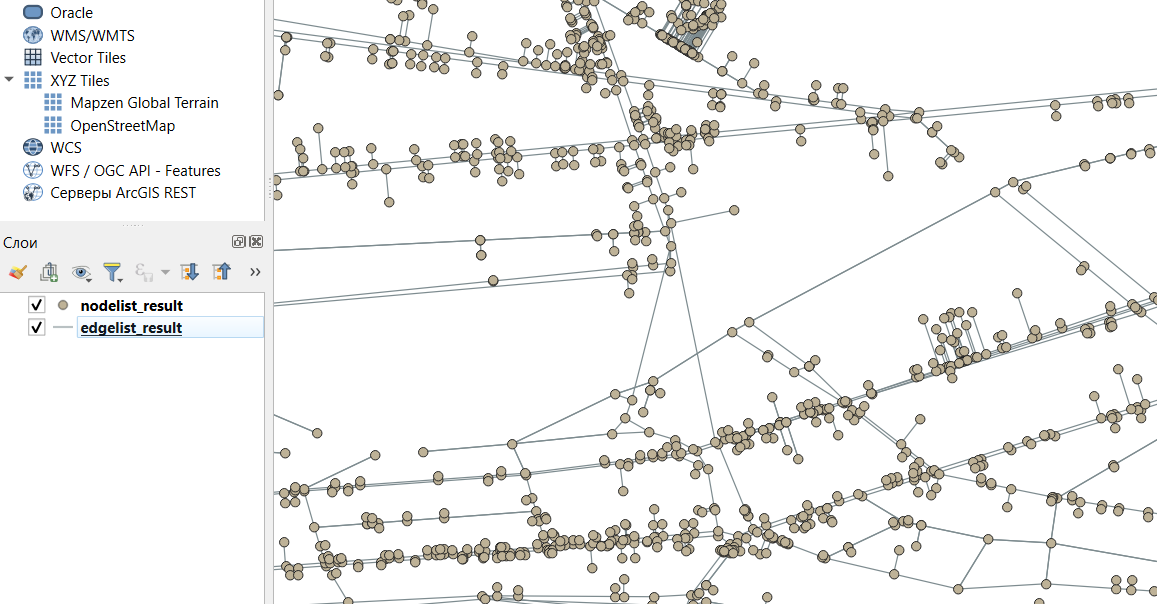